# Research on car sales ads

The database will be checked for erroneous data and null values. The data collected over the past few years will be examined and determined what factors influence the price of a car. will examine how many days the ad was shown. Will be analyzed the number of ads and the average price for a popular type of car. What factors influence the price the most.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Open-the-data-file-and-study-the-general-information." data-toc-modified-id="Step-1.-Open-the-data-file-and-study-the-general-information.-1">Step 1. Open the data file and study the general information.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-1" data-toc-modified-id="Conclusion-step-1-1.1">Conclusion step 1</a></span></li></ul></li><li><span><a href="#Step-2.-Data-preprocessing" data-toc-modified-id="Step-2.-Data-preprocessing-2">Step 2. Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-2" data-toc-modified-id="Conclusion-step-2-2.1">Conclusion step 2</a></span></li></ul></li><li><span><a href="#Step-3.-Make-calculations-and-add-them-to-the-table" data-toc-modified-id="Step-3.-Make-calculations-and-add-them-to-the-table-3">Step 3. Make calculations and add them to the table</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-3" data-toc-modified-id="Conclusion-step-3-3.1">Conclusion step 3</a></span></li></ul></li><li><span><a href="#Step-4.-Carry-out-exploratory-data-analysis" data-toc-modified-id="Step-4.-Carry-out-exploratory-data-analysis-4">Step 4. Carry out exploratory data analysis</a></span></li><li><span><a href="#Step-5.-Overall-conclusion" data-toc-modified-id="Step-5.-Overall-conclusion-5">Step 5. Overall conclusion</a></span></li></ul></div>

## Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette='Set2')

In [2]:
data = pd.read_csv('vehicles_us.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [3]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Conclusion step 1

at first look i saw that in price minimum is 1$. Minimum model year is 1908, need will be see what is car. Odometer has minimum 0. 4wd have only 1.
And data have NaN values.

## Step 2. Data preprocessing

In [4]:
data.drop(index=data.index[data['price'] == 1], inplace=True)
data.reset_index(drop=True, inplace=True)

Price in 1$ have 1,5%. I drop it.

In [5]:
model = data[data['model_year'].isnull()]['model'].unique()
# get series of model witch have NaN in model year
for i in model:
    # get median for each model
    median = data[data['model'] == i]['model_year'].median()
    data['model_year'].loc[data['model'] == i] = data[data['model']
                                                      == i]['model_year'].fillna(value=median)
    # fill median for each model

In model_year data have 3567 rows. I changed NaN to an median by calculating it for each model.

In [6]:
data.drop(index=data.index[data['model_year'] < 1949], inplace=True)
data.reset_index(drop=True, inplace=True)

i delete this row because this models didn't make in this year. (quick check in wikipedia)

In [7]:
model = data[data['cylinders'].isnull()]['model'].unique()
# get series of model witch have NaN in cylinders
for i in model:
    # get median for each model
    median = data[data['model'] == i]['cylinders'].median()
    data['cylinders'].loc[data['model'] == i] = data[data['model']
                                                     == i]['cylinders'].fillna(value=median)
    # fill median for each model

In cylinders data have 5189 rows. I changed NaN to an median by calculating it for each model.

In [8]:
data['is_4wd'] = data['is_4wd'].fillna(value=False)
data['is_4wd'][data['is_4wd'] == 1] = True

We have only 1 and NaN values. Changed 1 to True and NaN to False as logic like have or doesn't 4wd.

In [9]:
data[['model_year', 'cylinders']] = data[[
    'model_year', 'cylinders', ]].astype('int64')
data[['model_year', 'cylinders']] = data[[
    'model_year', 'cylinders', ]].astype('int64')
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

Change model_year and cylinders in int type. Also date posted to datetime format.

### Conclusion step 2
Data have a lot of strange information, like year when cars didn't made. Price for cars by 1$. Was a lot data with None information. I changed data type for better.
## Step 3. Make calculations and add them to the table

In [10]:
data['year'] = pd.DatetimeIndex(data['date_posted']).year
# made new column with year of ads add
data['month'] = pd.DatetimeIndex(data['date_posted']).month
# made new column with name of mounth of ads add
data['day'] = pd.DatetimeIndex(data['date_posted']).day_name()
# made new column with name of day of ads add
data['vehicle_age'] = data['year'] - data['model_year']
# calculated vehicle age when ads add
data['average_mileage'] = round(data['odometer'] / data['vehicle_age'])
# calculate average mileage per year for each car
data['average_mileage'].replace(np.inf, np.nan, inplace=True)
# when the car is new, division by 0. Change inf to NaN

Make calculations with date and mileage.

In [11]:
data['average_mileage_for_model'] = data.groupby(
    'model')['average_mileage'].transform(lambda grp: grp.median())
# made column with average mileage for each model
data['average_mileage'] = (data['average_mileage'].where(((data['average_mileage'].notnull()) & (
    data['average_mileage'] != 0)), data['average_mileage_for_model']))
# fill NaN and 0 in average_mileage from average_mileage_for_model
data['odometer'] = (data['odometer'].where(((data['odometer'].notnull()) & (
    data['odometer'] != 0)), data['average_mileage']*data['vehicle_age']))
# calculated odometer by multiplying average_mileage to vehicle_age in rows with NaN or 0
# deleted the column because it is no longer needed
data.drop(['average_mileage_for_model'], axis=1, inplace=True)

In [12]:
data.drop(index=data.index[data['model'] ==
                           'mercedes-benz benze sprinter 2500'], inplace=True)
data.reset_index(inplace=True, drop=True)
data[['odometer', 'average_mileage']] = data[[
    'odometer', 'average_mileage', ]].astype('int64')

After calculeted odometer i find one model with NaN. It's looks like error or duplicate. 41 rows deleted with this model. 
Changed type to int for odometer and average_mileage.


In [13]:
data['condition'] = data['condition'].replace(to_replace=(
    'new', 'like new', 'excellent', 'good', 'fair', 'salvage'), value=(5, 4, 3, 2, 1, 0))

Changed condition to numbers from 5 to 0.

### Conclusion step 3
managed to restore the approximate mileage for many ads. Changed the machine condition data to a numerical parameter for the convenience of building histograms.
## Step 4. Carry out exploratory data analysis

Determined the upper limits of outliers. Price below 100 above  45000$, vehicle_age upper 30 years. cylinders below 4 and above 10, odometer upper 360000 and condition below 0 above 5. This data small and not significant.

In [14]:
filter_data = data.query(
    "100 < price <= 45000 & vehicle_age <= 30 & 4 <= cylinders <= 10 & odometer <= 360000 & 0 < condition < 5")

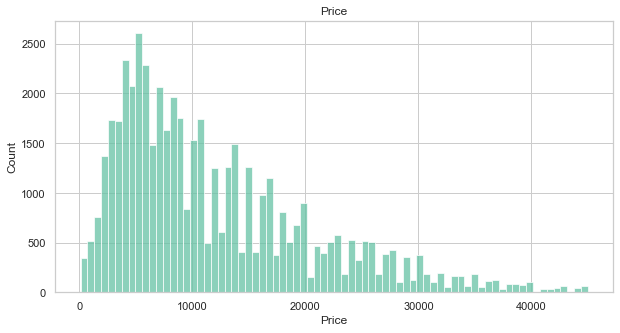

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(filter_data, x='price')
plt.title('Price')
plt.xlabel('Price');

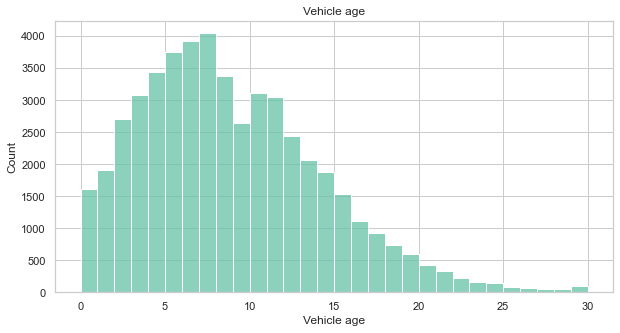

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(filter_data, x='vehicle_age', bins=30)
plt.title('Vehicle age')
plt.xlabel('Vehicle age');

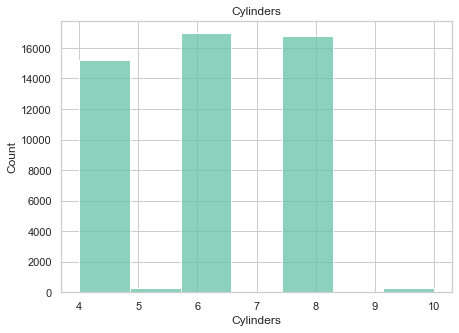

In [17]:
plt.figure(figsize=(7, 5))
sns.histplot(filter_data, x='cylinders', bins=7)
plt.xlabel('Cylinders')
plt.title('Cylinders');

Text(0.5, 1.0, 'Mileage')

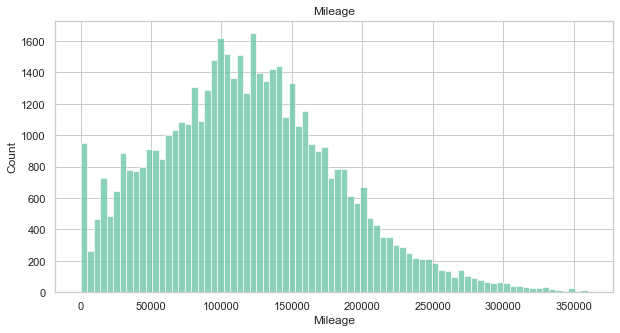

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(filter_data, x='odometer')
plt.xlabel('Mileage')
plt.title('Mileage');

Text(0.5, 1.0, 'Condition')

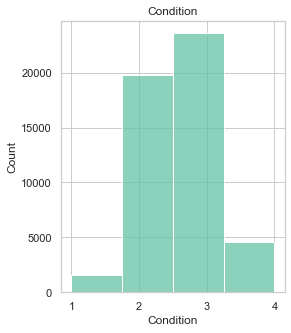

In [19]:
plt.figure(figsize=(4, 5))
sns.histplot(filter_data, x='condition', bins=4)
plt.xlabel('Condition')
plt.title('Condition');

Made filtered df without the upper limits of outliers. More cars with price about 4000$, 7 age, 6 and 8 cylinders with mileage about 120000, and excellent condition. 

Text(0.5, 1.0, 'Day listed')

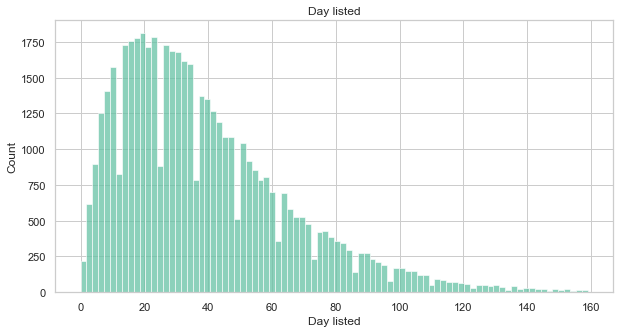

In [36]:
filter_data = filter_data.query("days_listed < 160")
plt.figure(figsize=(10, 5))
sns.histplot(filter_data, x='days_listed')
plt.xlabel('Day listed')
plt.title('Day listed');

days_listed above 160 small and not significant. Many cars sold about 19 days.

Text(0.5, 1.0, 'Days listed')

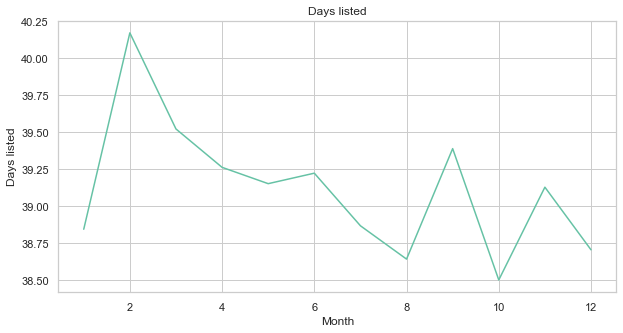

In [21]:
plt.figure(figsize=(10, 5))
filter_data.groupby('month')['days_listed'].mean().plot()
plt.xlabel('Month')
plt.ylabel('Days listed')
plt.title('Days listed');

in october cars sold more quickly than in february.

In [22]:
type_cars = filter_data[['type', 'price']]
type_cars.groupby('type').median().sort_values('price', ascending=False)

,price
type,
truck,14995
pickup,14400
coupe,13900
offroad,11800
convertible,11250
bus,10500
other,8995
SUV,8990
van,7925


top 3 cars with hightes price is truck, pickup and coupe.

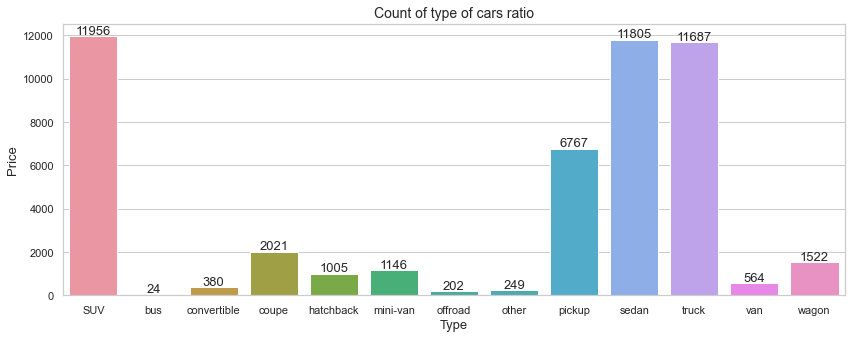

In [23]:
fig = type_cars.groupby('type').count().reset_index()
plt.figure(figsize=(14, 5))
splot = sns.barplot(data=fig, x='type', y='price')
plt.title('Count of type of cars ratio', size=14)
plt.xlabel('Type', size=13)
plt.ylabel('Price', size=13)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=13,
                   xytext=(0, 5),
                   textcoords='offset points')

top 3 ads counts for SUV, sedan and truck.

In [24]:
SUV_filter = filter_data.query(
    'paint_color != "yellow" & paint_color != "purple" & type == "SUV"')
# colour with more 50 ads and transmission with more 50 ads.

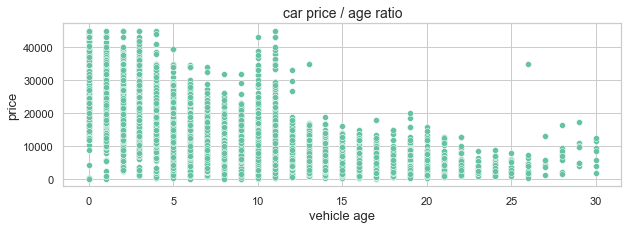

In [25]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=SUV_filter, x='vehicle_age', y='price')
plt.title('car price / age ratio', size=14)
plt.xlabel('vehicle age', size=13)
plt.ylabel('price', size=13);

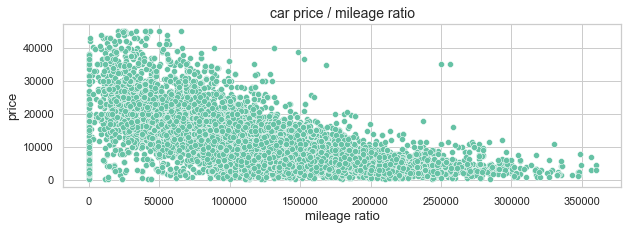

In [26]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=SUV_filter, x='odometer', y='price')
plt.title('car price / mileage ratio', size=14)
plt.xlabel('mileage ratio', size=13)
plt.ylabel('price', size=13);

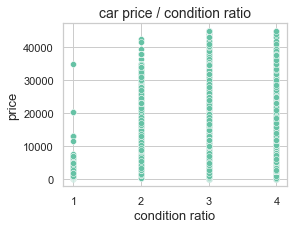

In [27]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=SUV_filter, x='condition', y='price')
plt.title('car price / condition ratio', size=14)
plt.xlabel('condition ratio', size=13)
plt.ylabel('price', size=13);

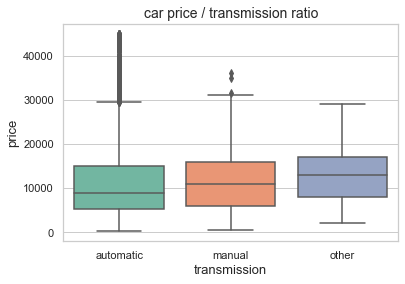

In [28]:
sns.boxplot(data=SUV_filter, x='transmission', y='price')
plt.title('car price / transmission ratio', size=14)
plt.xlabel('transmission', size=13)
plt.ylabel('price', size=13);

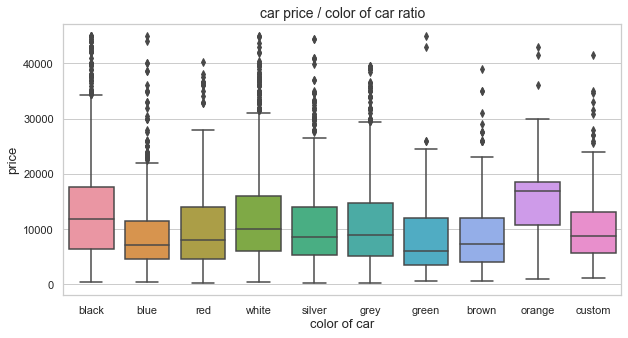

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=SUV_filter, x='paint_color', y='price')
plt.title('car price / color of car ratio', size=14)
plt.xlabel('color of car', size=13)
plt.ylabel('price', size=13);

For SUV type more high price for new cars. 10 year also have high price. I think people after 10 year want to sold cars and we have a lot of ads. we see a direct dependence of the price on the mileage. like with condition. price for manual transmission is more high than automatic. Orange and black cars more expencive.

In [30]:
sedan_filter = filter_data.query(
    'paint_color != "yellow" & paint_color != "purple" & paint_color != "orange" & type == "sedan"')
# colour with more 50 ads and transmission with more 50 ads.

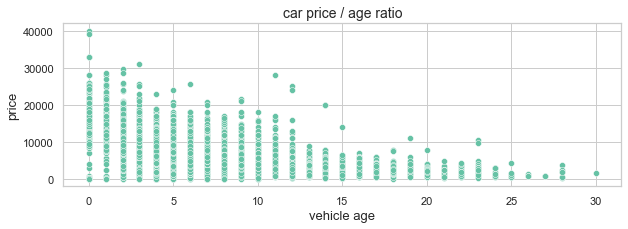

In [31]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=sedan_filter, x='vehicle_age', y='price')
plt.title('car price / age ratio', size=14)
plt.xlabel('vehicle age', size=13)
plt.ylabel('price', size=13);

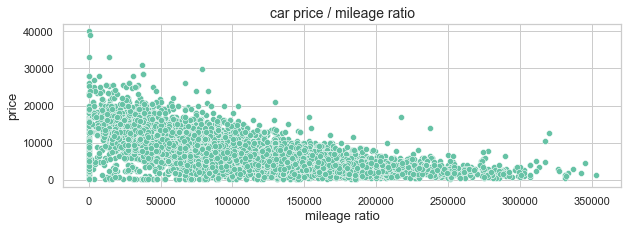

In [32]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=sedan_filter, x='odometer', y='price')
plt.title('car price / mileage ratio', size=14)
plt.xlabel('mileage ratio', size=13)
plt.ylabel('price', size=13);

Text(0, 0.5, 'price')

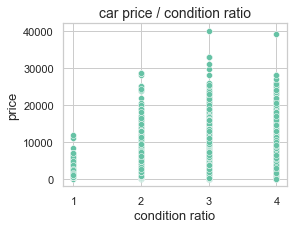

In [33]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=sedan_filter, x='condition', y='price')
plt.title('car price / condition ratio', size=14)
plt.xlabel('condition ratio', size=13)
plt.ylabel('price', size=13)

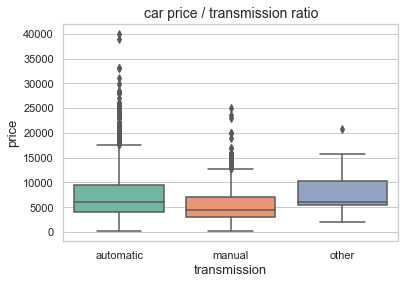

In [34]:
sns.boxplot(data=sedan_filter, x='transmission', y='price')
plt.title('car price / transmission ratio', size=14)
plt.xlabel('transmission', size=13)
plt.ylabel('price', size=13);

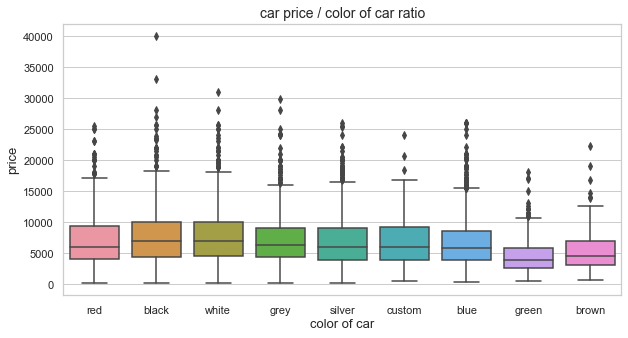

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=sedan_filter, x='paint_color', y='price')
plt.title('car price / color of car ratio', size=14)
plt.xlabel('color of car', size=13)
plt.ylabel('price', size=13);

the sedan has a more linear age-price ratio than the suv. Like a odometer-price ration. Exelent condiion have more higt price then like new car. I think it is because more ads with exelent condition. price for automatic transmission is more high than manual. Black and with cars more expencive.

## Step 5. Overall conclusion

Data have a lot of strange information. need to make important data such as mileage, make age required when filling out. The database contained ads with a price for the car below 100 dollars. I recognized this data as erroneous.
For many ads, the number of cylinders, year of car production, mileage were calculated.
age and mileage affect the price the most. the color and type of transmission affects depending on the type of vehicle. in the spring, cars sell better, worse in winter. A lot of cars with a price of about $ 4000, age 7, 6 and 8 cylinders with mileage of about 120,000, in excellent condition.
Highest average price for truck (14995) pickup (14400) and coupe (13900)
The most popular types of cars in ads are SUVs, sedans and trucks.
for SUV and sedan, study was conducted on the ratio of price and age (the younger the more expensive), price and mileage (the less the more expensive), condition (also linearly), transmission and body color.